### Data Explore Exercises

Do your work for this exercise in a file named `explore`.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import pandas as pd
import nltk
import acquire
import prepare

plt.rc('figure', figsize = (13, 7))
plt.style.use('seaborn-darkgrid')

1. Spam Data

    a. Load the spam data set.
    
    b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    
    c. Is there any overlap in the bigrams for the spam data and the ham data?
    
    d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
df = pd.read_csv('spam_clean.csv')
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [4]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [5]:
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [6]:
# spam data bigrams
list(nltk.bigrams(spam_words.split()))

[('free', 'entry'),
 ('entry', 'in'),
 ('in', '2'),
 ('2', 'a'),
 ('a', 'wkly'),
 ('wkly', 'comp'),
 ('comp', 'to'),
 ('to', 'win'),
 ('win', 'fa'),
 ('fa', 'cup'),
 ('cup', 'final'),
 ('final', 'tkts'),
 ('tkts', '21st'),
 ('21st', 'may'),
 ('may', '2005'),
 ('2005', 'text'),
 ('text', 'fa'),
 ('fa', 'to'),
 ('to', '87121'),
 ('87121', 'to'),
 ('to', 'receive'),
 ('receive', 'entry'),
 ('entry', 'questionstd'),
 ('questionstd', 'txt'),
 ('txt', 'ratetcs'),
 ('ratetcs', 'apply'),
 ('apply', '08452810075over18s'),
 ('08452810075over18s', 'freemsg'),
 ('freemsg', 'hey'),
 ('hey', 'there'),
 ('there', 'darling'),
 ('darling', 'its'),
 ('its', 'been'),
 ('been', '3'),
 ('3', 'weeks'),
 ('weeks', 'now'),
 ('now', 'and'),
 ('and', 'no'),
 ('no', 'word'),
 ('word', 'back'),
 ('back', 'id'),
 ('id', 'like'),
 ('like', 'some'),
 ('some', 'fun'),
 ('fun', 'you'),
 ('you', 'up'),
 ('up', 'for'),
 ('for', 'it'),
 ('it', 'still'),
 ('still', 'tb'),
 ('tb', 'ok'),
 ('ok', 'xxx'),
 ('xxx', 'std'),
 (

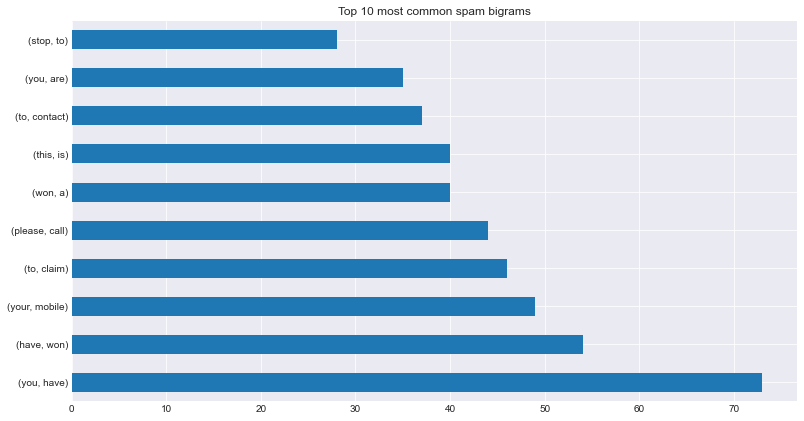

In [7]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams');

(-0.5, 999.5, 999.5, -0.5)

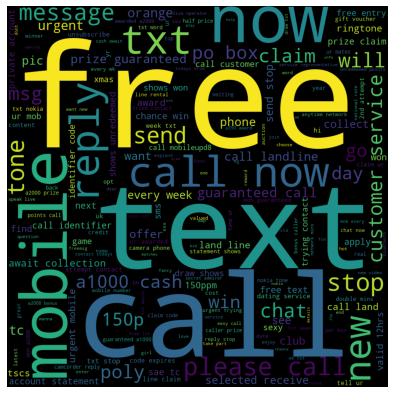

In [8]:
from wordcloud import WordCloud
img = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(spam_words)
plt.imshow(img)
plt.axis('off')

In [9]:
# ham data bigrams
list(nltk.bigrams(ham_words.split()))

[('go', 'until'),
 ('until', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'only'),
 ('only', 'in'),
 ('in', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'there'),
 ('there', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'u'),
 ('u', 'oni'),
 ('oni', 'u'),
 ('u', 'dun'),
 ('dun', 'say'),
 ('say', 'so'),
 ('so', 'early'),
 ('early', 'hor'),
 ('hor', 'u'),
 ('u', 'c'),
 ('c', 'already'),
 ('already', 'then'),
 ('then', 'say'),
 ('say', 'nah'),
 ('nah', 'i'),
 ('i', 'dont'),
 ('dont', 'think'),
 ('think', 'he'),
 ('he', 'goes'),
 ('goes', 'to'),
 ('to', 'usf'),
 ('usf', 'he'),
 ('he', 'lives'),
 ('lives', 'around'),
 ('around', 'here'),
 ('here', 'though'),
 ('though', 'even'),
 ('even', 'my'),
 ('my', 'brother'),
 ('brother', 'is'),
 ('is', 'not'),
 ('not', 'lik

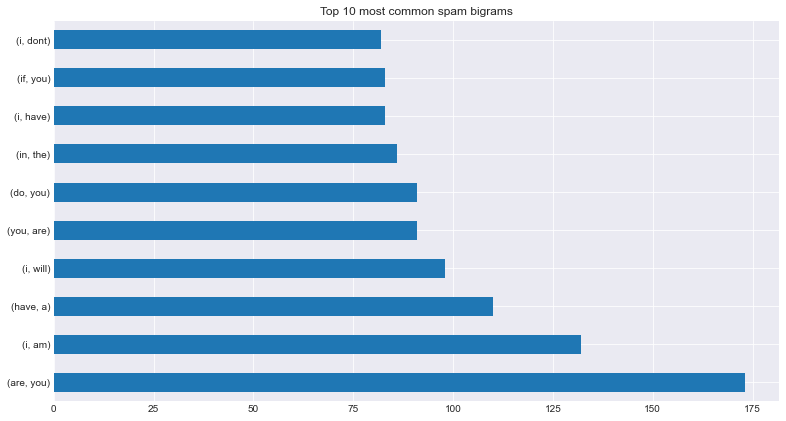

In [10]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams');

(-0.5, 999.5, 999.5, -0.5)

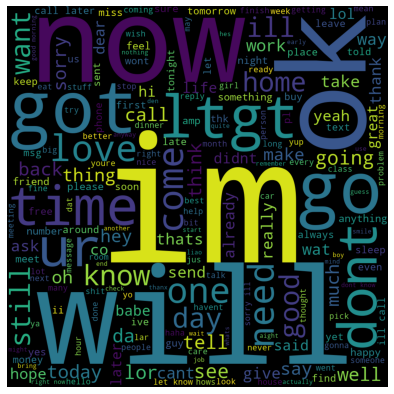

In [11]:
from wordcloud import WordCloud
img = WordCloud(background_color = 'black', width = 1000, height = 1000).generate(ham_words)
plt.imshow(img)
plt.axis('off')

In [12]:
# spam data trigrams
list(nltk.trigrams(spam_words.split()))

[('free', 'entry', 'in'),
 ('entry', 'in', '2'),
 ('in', '2', 'a'),
 ('2', 'a', 'wkly'),
 ('a', 'wkly', 'comp'),
 ('wkly', 'comp', 'to'),
 ('comp', 'to', 'win'),
 ('to', 'win', 'fa'),
 ('win', 'fa', 'cup'),
 ('fa', 'cup', 'final'),
 ('cup', 'final', 'tkts'),
 ('final', 'tkts', '21st'),
 ('tkts', '21st', 'may'),
 ('21st', 'may', '2005'),
 ('may', '2005', 'text'),
 ('2005', 'text', 'fa'),
 ('text', 'fa', 'to'),
 ('fa', 'to', '87121'),
 ('to', '87121', 'to'),
 ('87121', 'to', 'receive'),
 ('to', 'receive', 'entry'),
 ('receive', 'entry', 'questionstd'),
 ('entry', 'questionstd', 'txt'),
 ('questionstd', 'txt', 'ratetcs'),
 ('txt', 'ratetcs', 'apply'),
 ('ratetcs', 'apply', '08452810075over18s'),
 ('apply', '08452810075over18s', 'freemsg'),
 ('08452810075over18s', 'freemsg', 'hey'),
 ('freemsg', 'hey', 'there'),
 ('hey', 'there', 'darling'),
 ('there', 'darling', 'its'),
 ('darling', 'its', 'been'),
 ('its', 'been', '3'),
 ('been', '3', 'weeks'),
 ('3', 'weeks', 'now'),
 ('weeks', 'now', '

In [13]:
# ham data trigrams
list(nltk.trigrams(ham_words.split()))

[('go', 'until', 'jurong'),
 ('until', 'jurong', 'point'),
 ('jurong', 'point', 'crazy'),
 ('point', 'crazy', 'available'),
 ('crazy', 'available', 'only'),
 ('available', 'only', 'in'),
 ('only', 'in', 'bugis'),
 ('in', 'bugis', 'n'),
 ('bugis', 'n', 'great'),
 ('n', 'great', 'world'),
 ('great', 'world', 'la'),
 ('world', 'la', 'e'),
 ('la', 'e', 'buffet'),
 ('e', 'buffet', 'cine'),
 ('buffet', 'cine', 'there'),
 ('cine', 'there', 'got'),
 ('there', 'got', 'amore'),
 ('got', 'amore', 'wat'),
 ('amore', 'wat', 'ok'),
 ('wat', 'ok', 'lar'),
 ('ok', 'lar', 'joking'),
 ('lar', 'joking', 'wif'),
 ('joking', 'wif', 'u'),
 ('wif', 'u', 'oni'),
 ('u', 'oni', 'u'),
 ('oni', 'u', 'dun'),
 ('u', 'dun', 'say'),
 ('dun', 'say', 'so'),
 ('say', 'so', 'early'),
 ('so', 'early', 'hor'),
 ('early', 'hor', 'u'),
 ('hor', 'u', 'c'),
 ('u', 'c', 'already'),
 ('c', 'already', 'then'),
 ('already', 'then', 'say'),
 ('then', 'say', 'nah'),
 ('say', 'nah', 'i'),
 ('nah', 'i', 'dont'),
 ('i', 'dont', 'think'

2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [14]:
codeup_df = acquire.get_blog_articles()
codeup_df

/Users/davidrodriguez/codeup-data-science/natural-language-processing-exercises/acquire.py:12: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 12 of the file /Users/davidrodriguez/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)
/Users/davidrodriguez/codeup-data-science/natural-language-processing-exercises/acquire.py:22: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a 

,title,published,content
0,Codeup Dallas Open House,"Nov 30, 2021",Come join us for the re-opening of our Dallas ...
1,Codeup’s Placement Team Continues Setting Records,"Nov 19, 2021",Our Placement Team is simply defined as a grou...
2,"IT Certifications 101: Why They Matter, and Wh...","Nov 18, 2021","AWS, Google, Azure, Red Hat, CompTIA…these are..."
3,A rise in cyber attacks means opportunities fo...,"Nov 17, 2021","In the last few months, the US has experienced..."
4,Use your GI Bill® benefits to Land a Job in Tech,"Nov 4, 2021","As the end of military service gets closer, ma..."
5,Which program is right for me: Cyber Security ...,"Oct 28, 2021",What IT Career should I choose?\nIf you’re thi...
6,What the Heck is System Engineering?,"Oct 21, 2021",Codeup offers a 13-week training program: Syst...
7,From Speech Pathology to Business Intelligence,"Oct 18, 2021","By: Alicia Gonzalez\nBefore Codeup, I was a ho..."
8,Boris – Behind the Billboards,"Oct 3, 2021",
9,Is Codeup the Best Bootcamp in San Antonio…or ...,"Sep 16, 2021",Looking for the best data science bootcamp in ...


In [34]:
blog_words = ' '.join(codeup_df.content)

In [35]:
blog_freq = pd.Series(blog_words.split()).value_counts()
blog_freq

the           208
and           206
to            205
a             186
in            128
             ... 
packet          1
protocols,      1
model,          1
OSI             1
Then,           1
Length: 2229, dtype: int64

In [45]:
blog_counts = pd.DataFrame(blog_freq.fillna(0).astype(int))
blog_counts = blog_counts.reset_index()
blog_counts.rename(columns = {'index': 'word', 0:'count'}, inplace = True)
blog_counts

,word,count
0,the,208
1,and,206
2,to,205
3,a,186
4,in,128
...,...,...
2224,packet,1
2225,"protocols,",1
2226,"model,",1
2227,OSI,1


In [26]:
# data bigrams
list(nltk.bigrams(blog_words.split()))

[('Come', 'join'),
 ('join', 'us'),
 ('us', 'for'),
 ('for', 'the'),
 ('the', 're-opening'),
 ('re-opening', 'of'),
 ('of', 'our'),
 ('our', 'Dallas'),
 ('Dallas', 'Campus'),
 ('Campus', 'with'),
 ('with', 'some'),
 ('some', 'drinks'),
 ('drinks', 'and'),
 ('and', 'snacks'),
 ('snacks', 'at'),
 ('at', 'Codeup!'),
 ('Codeup!', 'Curious'),
 ('Curious', 'about'),
 ('about', 'what'),
 ('what', 'our'),
 ('our', 'campus'),
 ('campus', 'looks'),
 ('looks', 'like?'),
 ('like?', 'Click'),
 ('Click', 'here'),
 ('here', 'to'),
 ('to', 'register'),
 ('register', 'for'),
 ('for', 'free'),
 ('free', 'About'),
 ('About', 'this'),
 ('this', 'event'),
 ('event', 'Come'),
 ('Come', 'join'),
 ('join', 'us'),
 ('us', 'for'),
 ('for', 'the'),
 ('the', 're-opening'),
 ('re-opening', 'of'),
 ('of', 'our'),
 ('our', 'Dallas'),
 ('Dallas', 'Campus'),
 ('Campus', 'with'),
 ('with', 'some'),
 ('some', 'drinks'),
 ('drinks', 'and'),
 ('and', 'snacks'),
 ('snacks', 'at'),
 ('at', 'Codeup!'),
 ('Codeup!', 'Curious'

In [27]:
# data bigrams
list(nltk.trigrams(blog_words.split()))

[('Come', 'join', 'us'),
 ('join', 'us', 'for'),
 ('us', 'for', 'the'),
 ('for', 'the', 're-opening'),
 ('the', 're-opening', 'of'),
 ('re-opening', 'of', 'our'),
 ('of', 'our', 'Dallas'),
 ('our', 'Dallas', 'Campus'),
 ('Dallas', 'Campus', 'with'),
 ('Campus', 'with', 'some'),
 ('with', 'some', 'drinks'),
 ('some', 'drinks', 'and'),
 ('drinks', 'and', 'snacks'),
 ('and', 'snacks', 'at'),
 ('snacks', 'at', 'Codeup!'),
 ('at', 'Codeup!', 'Curious'),
 ('Codeup!', 'Curious', 'about'),
 ('Curious', 'about', 'what'),
 ('about', 'what', 'our'),
 ('what', 'our', 'campus'),
 ('our', 'campus', 'looks'),
 ('campus', 'looks', 'like?'),
 ('looks', 'like?', 'Click'),
 ('like?', 'Click', 'here'),
 ('Click', 'here', 'to'),
 ('here', 'to', 'register'),
 ('to', 'register', 'for'),
 ('register', 'for', 'free'),
 ('for', 'free', 'About'),
 ('free', 'About', 'this'),
 ('About', 'this', 'event'),
 ('this', 'event', 'Come'),
 ('event', 'Come', 'join'),
 ('Come', 'join', 'us'),
 ('join', 'us', 'for'),
 ('us'

In [ ]:
plt.rc('font', size = 18)
blog_counts.sort_values('all', ascending = False).head(20).plot.barh()
plt.title('Blog count for the top 20 most frequent words')

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the `category` variable when exploring.

In [29]:
news_df = acquire.get_inshorts_articles()
news_df

/Users/davidrodriguez/codeup-data-science/natural-language-processing-exercises/acquire.py:59: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 59 of the file /Users/davidrodriguez/codeup-data-science/natural-language-processing-exercises/acquire.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(response.text)


,title,author,content,date,category
0,Meta drops below Berkshire Hathaway in market ...,Hiral Goyal,Meta Platforms is now worth about $50 billion ...,"04 Feb 2022,Friday",business
1,Drop in Meta's market value more than the tota...,Arshiya Chopra,After Facebook parent Meta lost $251 billion i...,"04 Feb 2022,Friday",business
2,Amazon adds $135 bn in one of the biggest 1-da...,Hiral Goyal,Amazon added more than $135 billion in market ...,"04 Feb 2022,Friday",business
3,Facebook's user growth in India slowed due to ...,Sakshita Khosla,Facebook's user growth in India was hit due to...,"04 Feb 2022,Friday",business
4,RBI examining if BharatPe violated corporate g...,Hiral Goyal,The Reserve Bank of India (RBI) is examining i...,"04 Feb 2022,Friday",business
...,...,...,...,...,...
95,'365 Days' star Michele to make Indian debut w...,Udit Gupta,"Italian actor Michele Morrone, who starred in ...","04 Feb 2022,Friday",entertainment
96,Waheeda Rehman stood barefoot in temple set at...,Udit Gupta,Rakeysh Omprakash Mehra recalled shooting for ...,"04 Feb 2022,Friday",entertainment
97,Vicky in talks for Shah Rukh Khan's next with ...,Udit Gupta,Filmmaker Rajkumar Hirani is in advanced talks...,"04 Feb 2022,Friday",entertainment
98,He had the vigour to live till 100: Ajinkya De...,Udit Gupta,"Actor Ajinkya Deo, while speaking about his la...","04 Feb 2022,Friday",entertainment


In [32]:
news_words = ' '.join(news_df.content)

In [33]:
news_freq = pd.Series(news_words.split()).value_counts()
news_freq

the         219
to          143
in          137
of          116
and         104
           ... 
Egypt’s       1
(AFCON).      1
Nations       1
Africa        1
them,"        1
Length: 2483, dtype: int64